In [1]:
import pandas as pd

### preprocessing

In [2]:
df = pd.read_pickle("Tank.pkl") 

In [3]:
df.timestamp = pd.to_datetime(df.timestamp)

In [5]:
df_new = df.loc[df["CuStepNo ValueY"] != 2]
df_new["Next_Step"] = df_new["CuStepNo ValueY"].shift()
df_steps = df_new.loc[df_new["CuStepNo ValueY"] != df_new["Next_Step"]]

/var/folders/f6/gs3z1yx9005b5dmpnd_z3t3m0000gn/T/ipykernel_30210/2510048616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Next_Step"] = df_new["CuStepNo ValueY"].shift()


#durchschnittliche zeit

In [7]:
df_steps["Time_next"] = df_steps.timestamp.shift()

/var/folders/f6/gs3z1yx9005b5dmpnd_z3t3m0000gn/T/ipykernel_30210/884090360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steps["Time_next"] = df_steps.timestamp.shift()


In [8]:
df_steps["Diff"] = df_steps.timestamp - df_steps["Time_next"]

/var/folders/f6/gs3z1yx9005b5dmpnd_z3t3m0000gn/T/ipykernel_30210/1606829873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steps["Diff"] = df_steps.timestamp - df_steps["Time_next"]


In [9]:
df_steps[1:].groupby("Next_Step")["Diff"].mean()

Next_Step
1.0   0 days 00:04:15.301526717
3.0   0 days 01:41:23.693486590
7.0   0 days 00:01:11.103053435
8.0   0 days 00:08:56.356321839
Name: Diff, dtype: timedelta64[ns]

In [54]:
import datetime

df_steps["time_since_start"] = 0
steps = df_steps.timestamp.unique()
for i in range(len(steps)-1):
    df_steps.loc[df_steps.timestamp == steps[i],"time_since_start"] = (df_new.loc[(df_new.timestamp >= steps[i])&(df_new.timestamp < steps[i+1])].timestamp -steps[i]).max()
#replace all the 0s in time_since_start with the timedelta 0
df_steps.loc[df_steps.time_since_start == 0,"time_since_start"] = datetime.timedelta(0)

/var/folders/f6/gs3z1yx9005b5dmpnd_z3t3m0000gn/T/ipykernel_30210/1397815604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steps["time_since_start"] = 0
/var/folders/f6/gs3z1yx9005b5dmpnd_z3t3m0000gn/T/ipykernel_30210/1397815604.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_steps.loc[df_steps.timestamp == steps[i],"time_since_start"] = (df_new.loc[(df_new.timestamp >= steps[i])&(df_new.timestamp < steps[i+1])].timestamp -steps[i]).max()


In [55]:
df_steps[:].groupby("Next_Step")["time_since_start"].mean()

Next_Step
1.0    0 days 00:01:10.103053435
3.0    0 days 00:04:14.329501915
7.0    0 days 00:08:53.312977099
8.0    0 days 00:03:16.417624521
Name: time_since_start, dtype: object

In [56]:
times = df_steps[df_steps["CuStepNo ValueY"] == 1].timestamp.to_list()

In [57]:
df_test2 = pd.DataFrame(columns=['CuStepNo ValueY', 'DeviationID ValueY', 'LevelMainTank ValueY',
       'YC10001_MV ValueY', 'PI12002_PV_Out ValueY', 'PI12003_PV_Out ValueY',
       'YC14001_MV ValueY', 'FIC14002_MV ValueY', 'FIC14002_PV_Out ValueY',
       'FIC14002_SP ValueY', 'YC14006_MV ValueY', 'PI14012_PV_Out ValueY',
       'YC23001_MV ValueY', 'YC22001_MV ValueY', 'YC21001_MV ValueY',
       'FIC23002_PV_Out ValueY', 'FIC23002_MV ValueY', 'FIC23002_SP ValueY',
       'FIC22002_MV ValueY', 'FIC22002_PV_Out ValueY', 'FIC22002_SP ValueY',
       'FIC21002_MV ValueY', 'FIC21002_PV_Out ValueY', 'FIC21002_SP ValueY',
       'YS23004_Ctrl ValueY', 'YS22004_Ctrl ValueY', 'YS21004_Ctrl ValueY',
       'LIC23002_MV ValueY', 'LIC23002_PV_Out ValueY', 'LIC23002_SP ValueY',
       'LIC22002_MV ValueY', 'LIC22002_PV_Out ValueY', 'LIC22002_SP ValueY',
       'LIC21002_MV ValueY', 'LIC21002_PV_Out ValueY', 'LIC21002_SP ValueY',
       'PIC14007_MV ValueY', 'PIC14007_PV_Out ValueY', 'PIC14007_SP ValueY',
       'YC14008_Ctrl ValueY', 'PI10003_PV_Out ValueY', 'Next_Step', 'Batch'])

In [58]:
for i in range(times.__len__()-1):
    df_test1 = df_new.loc[(df_new.timestamp >=times[i])&(df_new.timestamp <times[i+1])].groupby("CuStepNo ValueY",as_index=False,sort=False).mean()
    df_test1["Batch"] = i
    df_test2 = pd.concat([df_test2,df_test1])

In [59]:
df_test1 = df_new.loc[(df_new.timestamp >=times[261])].groupby("CuStepNo ValueY",as_index=False,sort=False).mean()

In [91]:
df_test2["time_since_start"] = df_steps[:-3].time_since_start.values

In [105]:
df_test2["time_since_start"] = df_test2["time_since_start"].dt.total_seconds()

AttributeError: Can only use .dt accessor with datetimelike values

### clf

In [106]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [107]:
df_train = df_test2.copy()

In [108]:
X = df_train.drop(["DeviationID ValueY", "Batch"], axis=1)
y = df_train["DeviationID ValueY"].astype(int)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [118]:
grid_dtclf = GridSearchCV(
 estimator= DecisionTreeClassifier(),
 param_grid= dict(min_samples_split= [2, 10, 20, 50, 100], max_depth= [1, 6, 9, 11], random_state= [0]),
 scoring= "accuracy",
 n_jobs= -1,
 cv= 10
).fit(X_train, y_train)

print(f"Best param: {grid_dtclf.best_params_} \nBest score: {grid_dtclf.best_score_}")

Best param: {'max_depth': 11, 'min_samples_split': 2, 'random_state': 0} 
Best score: 0.85754446356856


In [119]:
dtc = DecisionTreeClassifier(max_depth= 11, min_samples_split= 2, random_state= 0).fit(X_train, y_train)

y_train_pred_dtc = dtc.predict(X_train)
y_test_pred_dtc = dtc.predict(X_test)

print(classification_report(y_test, y_test_pred_dtc))

              precision    recall  f1-score   support

           1       0.73      0.94      0.82        17
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        18
           4       0.95      1.00      0.98        20
           5       0.95      0.86      0.90        21
           6       0.83      0.83      0.83        23
           7       0.75      0.67      0.71        18
           8       1.00      0.87      0.93        23
           9       0.85      0.72      0.78        32
          10       0.60      0.79      0.68        19

    accuracy                           0.86       209
   macro avg       0.87      0.87      0.86       209
weighted avg       0.87      0.86      0.86       209



### isof

In [114]:
X_train

,CuStepNo ValueY,LevelMainTank ValueY,YC10001_MV ValueY,PI12002_PV_Out ValueY,PI12003_PV_Out ValueY,YC14001_MV ValueY,FIC14002_MV ValueY,FIC14002_PV_Out ValueY,FIC14002_SP ValueY,YC14006_MV ValueY,...,LIC21002_MV ValueY,LIC21002_PV_Out ValueY,LIC21002_SP ValueY,PIC14007_MV ValueY,PIC14007_PV_Out ValueY,PIC14007_SP ValueY,YC14008_Ctrl ValueY,PI10003_PV_Out ValueY,Next_Step,time_since_start
1,7,137.116303,100.0,0.0695,1.662774,58.530071,58.529519,1999.651501,2000.0,34.970526,...,6.176407,7.437583,15.0,28.841158,0.200669,0.2,0.0,0.001744,6.917808,72.0
2,8,84.734336,100.0,0.046754,1.650756,59.067402,59.069555,1999.496898,2000.0,26.478112,...,455.037783,10.419559,15.0,22.252735,0.198777,0.2,0.0,0.001731,7.998347,604.0
2,8,127.266632,100.0,0.07019,1.657495,59.184053,59.183315,2000.859551,2000.0,27.49577,...,466.601477,10.2926,15.0,22.159096,0.198661,0.2,0.0,0.001677,7.998311,591.0
3,3,137.848349,100.0,0.076524,0.140643,100.0,100.0,11.459082,2000.0,12.798493,...,10.346578,5.500016,15.0,10.740532,0.147834,0.2,0.0,0.001785,3.025907,192.0
2,8,79.697019,100.0,0.049512,1.645105,56.073828,56.070019,2001.551501,2000.0,26.648676,...,455.566619,10.446689,15.0,22.317588,0.198874,0.2,0.0,0.001708,7.998358,608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,7,87.614875,100.0,0.059337,1.648584,63.444646,63.448236,1999.370164,2000.0,35.297919,...,22.060106,7.326194,15.0,28.758931,0.203006,0.2,0.0,0.001749,6.917808,72.0
3,3,90.689956,100.0,0.056754,0.156002,96.938666,96.951993,100.323638,1979.145752,12.5,...,16.371631,5.57468,15.0,10.0,0.011107,0.2,0.0,0.001787,3.02551,195.0
3,3,88.208259,100.0,0.050599,0.169066,99.105823,99.110701,66.371796,2000.0,13.554537,...,14.85303,5.535952,15.0,11.165654,0.121608,0.2,0.0,0.001812,3.025253,197.0
3,3,132.434911,100.0,0.073577,0.190655,98.492129,98.513141,74.868272,2000.0,13.582639,...,17.533413,5.654949,15.0,11.077816,0.087923,0.2,0.0,0.001775,3.025126,198.0


In [115]:
from sklearn.ensemble import IsolationForest

grid_dtclf = GridSearchCV(
 estimator= IsolationForest(),
 param_grid= dict(random_state= [0]),
 scoring= "accuracy",
 n_jobs= -1,
 cv= 10
).fit(X_train, y_train)

print(f"Best param: {grid_dtclf.best_params_} \nBest score: {grid_dtclf.best_score_}")

Best param: {'random_state': 0} 
Best score: 0.13646012621916237


In [ ]:
dtc = DecisionTreeClassifier(max_depth= 11, min_samples_split= 2, random_state= 0).fit(X_train, y_train)

y_train_pred_dtc = dtc.predict(X_train)
y_test_pred_dtc = dtc.predict(X_test)

print(classification_report(y_test, y_test_pred_dtc))

### nn

In [135]:
X = df_train.drop(["DeviationID ValueY", "Batch"], axis=1)
y = df_train["DeviationID ValueY"].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train.shape, y_train.shape

((887, 42), (887,))

In [148]:
import torch
torch.manual_seed(0) # to ensure reproducibiltiy

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

X_train = X_train.astype(float)
X_test = X_test.astype(float)

train_x = torch.Tensor(X_train.values).float().to(device)
test_x = torch.Tensor(X_test.values).float().to(device)
train_y = torch.Tensor(y_train.values).long().to(device)
test_y = torch.Tensor(y_test.values).long().to(device)

Using cpu device


In [150]:
train_x.shape

torch.Size([887, 42])

In [167]:
import torch.nn as nn

class DeepNeuralNetwork(nn.Module): 
    def __init__(self):
        
        super(DeepNeuralNetwork, self).__init__() 
        
        # defining layers
        self.hidden1 = nn.Linear(42, 10)
        self.output = nn.Linear(10, 11)

    def forward(self, x):
        
        z1 = self.hidden1(x)
        a1 = torch.relu(z1)
        z2 = self.output(a1)
        return z2

In [168]:
dnn = DeepNeuralNetwork()
dnn.to(device)
dnn.train()

DeepNeuralNetwork(
  (hidden1): Linear(in_features=42, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=11, bias=True)
)

In [174]:
no_epochs = 200
learning_rate = 0.01

loss_func = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(dnn.parameters(), lr=learning_rate)

losses = []
for iteration in range(no_epochs):
    
    optimizer.zero_grad()
    y_hat = dnn(train_x) 
    
    loss = loss_func(y_hat, train_y)
    loss.backward() 
    optimizer.step()

    losses.append(loss.item())
    if iteration % 20 == 0:
        print(f"Loss in epoch {iteration} is {loss.item()}")

Loss in epoch 0 is 2.3873705863952637
Loss in epoch 20 is 2.3853323459625244
Loss in epoch 40 is 2.3833632469177246
Loss in epoch 60 is 2.381460666656494
Loss in epoch 80 is 2.379621982574463
Loss in epoch 100 is 2.3778440952301025
Loss in epoch 120 is 2.376124858856201
Loss in epoch 140 is 2.3744616508483887
Loss in epoch 160 is 2.372852087020874
Loss in epoch 180 is 2.371293067932129


Text(0, 0.5, 'loss')

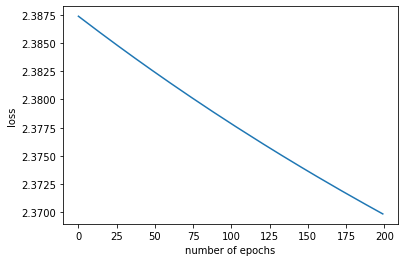

In [175]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(range(0, no_epochs), losses)
plt.xlabel('number of epochs')
plt.ylabel('loss')

In [176]:
dnn.eval() 
y_pred = dnn(test_x)
predicted = torch.argmax(y_pred.data, 1)
correct = (predicted == test_y).sum().item()
accuracy = correct / len(test_x)

print(f"Accuarcy is {100. * accuracy}%")

Accuarcy is 12.101910828025478%
